In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# @title Figure Settings
import ipywidgets as widgets #interactive display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")


def plot_isis(single_neuron_isis):
  plt.hist(single_neuron_isis, bins=50, histtype="stepfilled")
  plt.axvline(single_neuron_isis.mean(), color="orange", label="Mean ISI")
  plt.xlabel("ISI duration (s)")
  plt.ylabel("Number of spikes")
  plt.legend()

#@title Data retrieval
#@markdown This cell downloads the example dataset that we will use in this tutorial.
import io
import requests
r = requests.get('https://osf.io/sy5xt/download')
if r.status_code != 200:
  print('Failed to download data')
else:
  spike_times = np.load(io.BytesIO(r.content), allow_pickle=True)['spike_times']


In [10]:
data = np.load(io.BytesIO(r.content), allow_pickle=True)
for key in data.keys():
    print(key)

spike_times


In [23]:
print(spike_times.shape)


(734,)


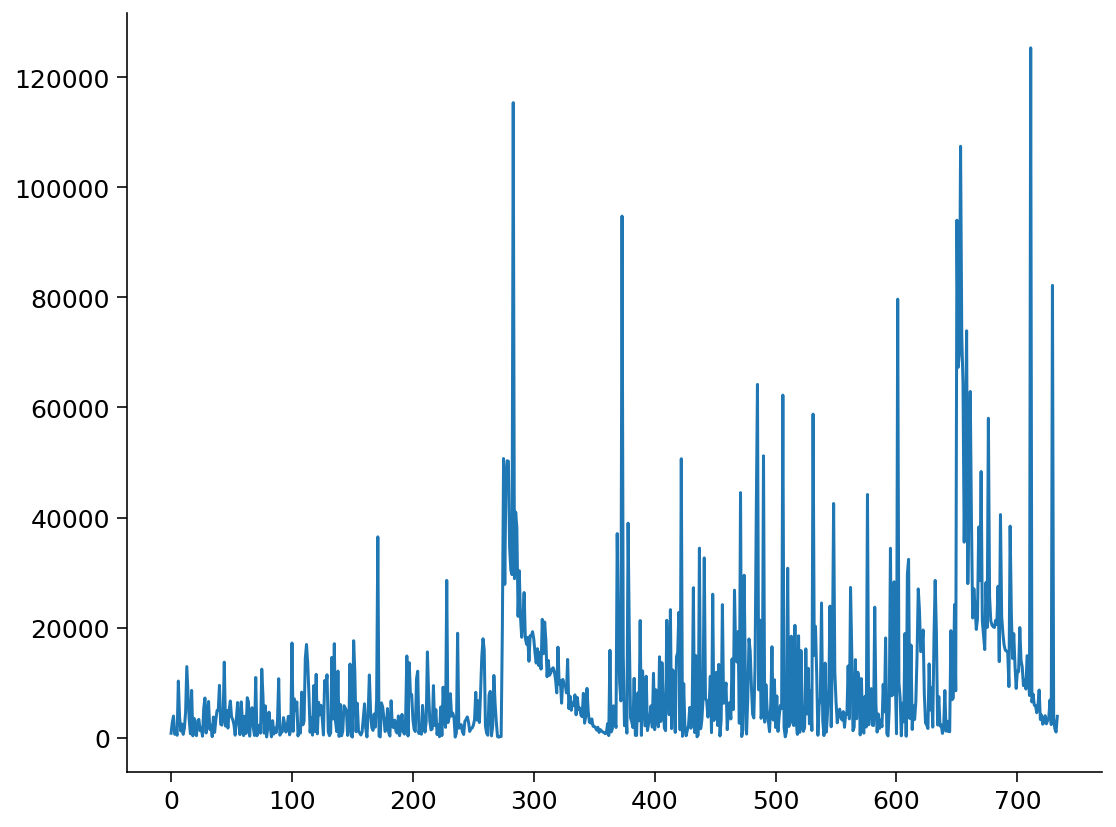

In [57]:

plt.figure()
t_s = [len(x) for x in spike_times]
# t_s = np.array(t_s)
plt.plot(range(len(spike_times)), t_s)

plt.show()

Text(0, 0.5, 'Number of neurons')

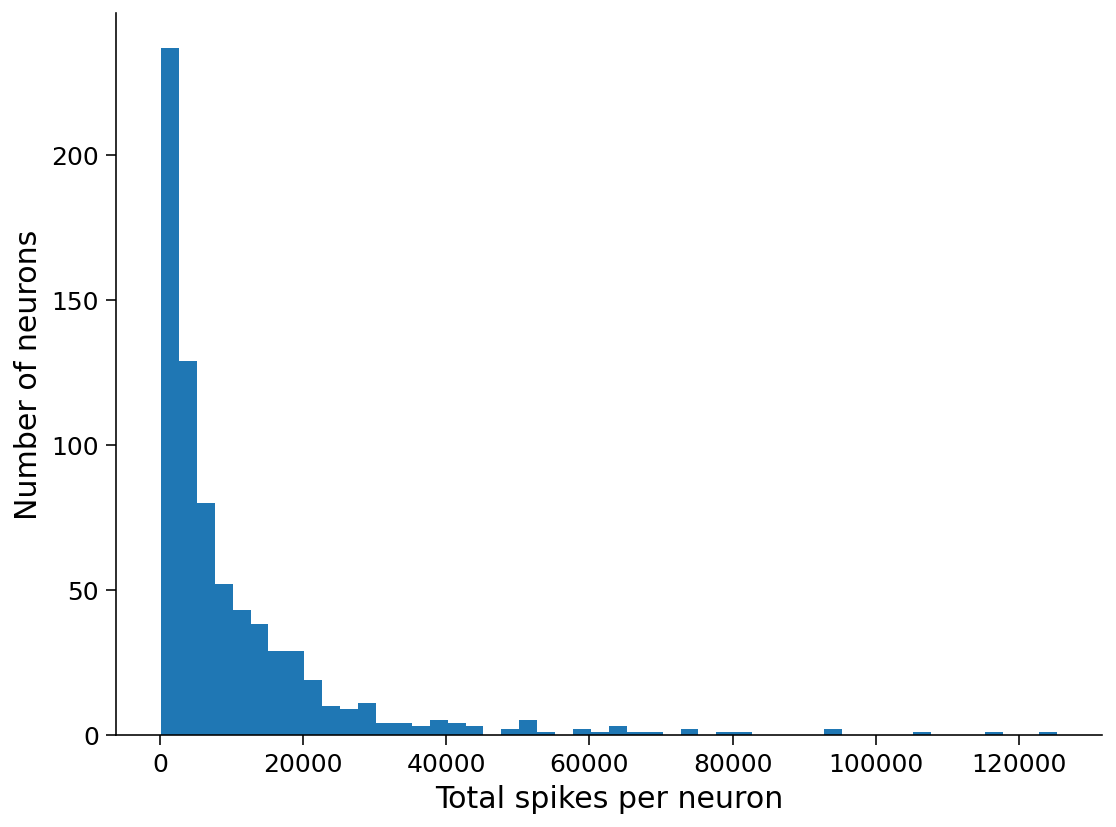

In [59]:
plt.hist(t_s, bins=50, histtype="stepfilled")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")

In [61]:
mean_spike_count = np.mean(t_s)
frac_below_mean = (t_s < mean_spike_count).mean()
print(f"{frac_below_mean:2.1%} of neurons are below the mean")

68.0% of neurons are below the mean


d:\ProgramData\Anaconda3\envs\blazkowiz\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


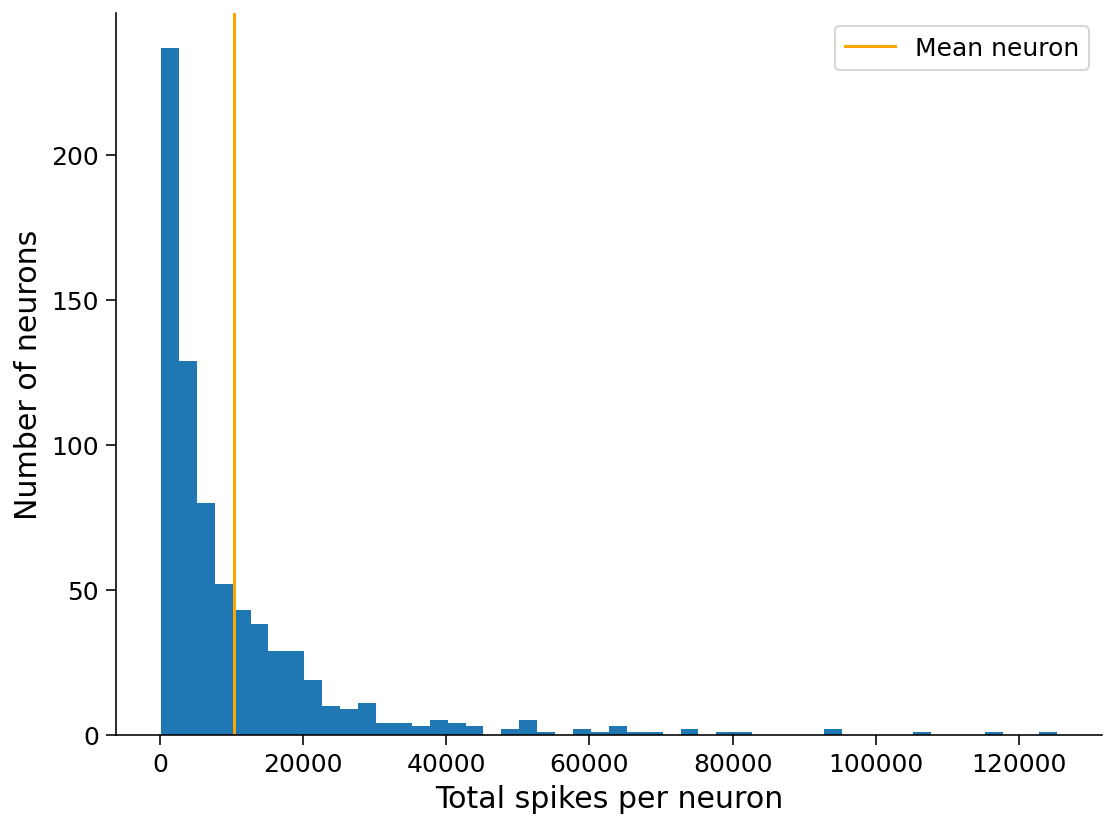

In [62]:
plt.hist(t_s, bins=50, histtype="stepfilled")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.legend()

49.9% of neurons are below the mean


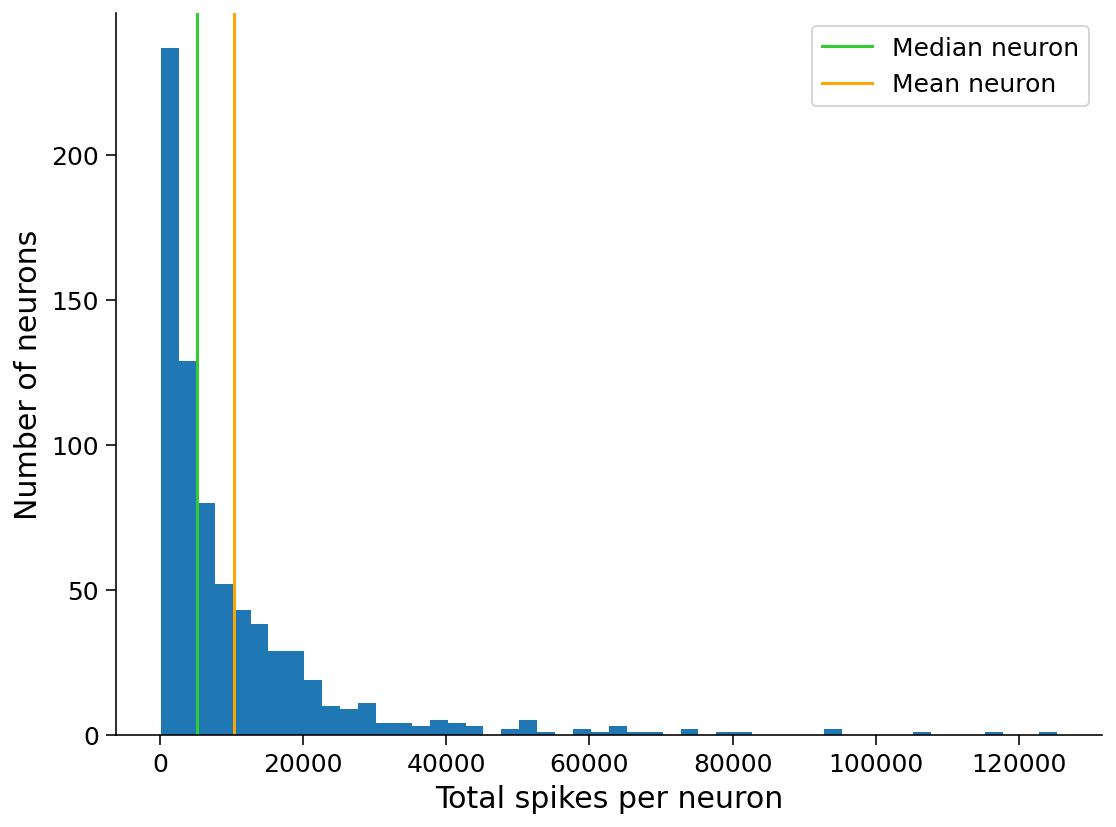

In [71]:
# Compute median spike count
median_spike_count = np.median(t_s)  # Hint: Try the function np.median

# Visualize median, mean, and histogram
plt.hist(t_s, bins=50, histtype="stepfilled")
plt.axvline( median_spike_count, color="limegreen", label="Median neuron")
plt.axvline(mean_spike_count, color="orange", label="Mean neuron")
plt.xlabel("Total spikes per neuron")
plt.ylabel("Number of neurons")
plt.legend()

print(f"{( t_s < median_spike_count ).mean():2.1%} of neurons are below the mean")

In [68]:
# @markdown Execute this cell for helper function `restrict_spike_times`
def restrict_spike_times(spike_times, interval):
  """Given a spike_time dataset, restrict to spikes within given interval.

  Args:
    spike_times (sequence of np.ndarray): List or array of arrays,
      each inner array has spike times for a single neuron.
    interval (tuple): Min, max time values; keep min <= t < max.

  Returns:
    np.ndarray: like `spike_times`, but only within `interval`
  """
  interval_spike_times = []
  for spikes in spike_times:
    interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
    interval_spike_times.append(spikes[interval_mask])
  return np.array(interval_spike_times, object)

In [69]:
t_interval = (5, 15)  # units are seconds after start of recording
interval_spike_times = restrict_spike_times(spike_times, t_interval)

In [70]:
original_counts = sum([len(spikes) for spikes in spike_times])
interval_counts = sum([len(spikes) for spikes in interval_spike_times])
frac_interval_spikes = interval_counts / original_counts
print(f"{frac_interval_spikes:.2%} of the total spikes are in the interval")

0.33% of the total spikes are in the interval


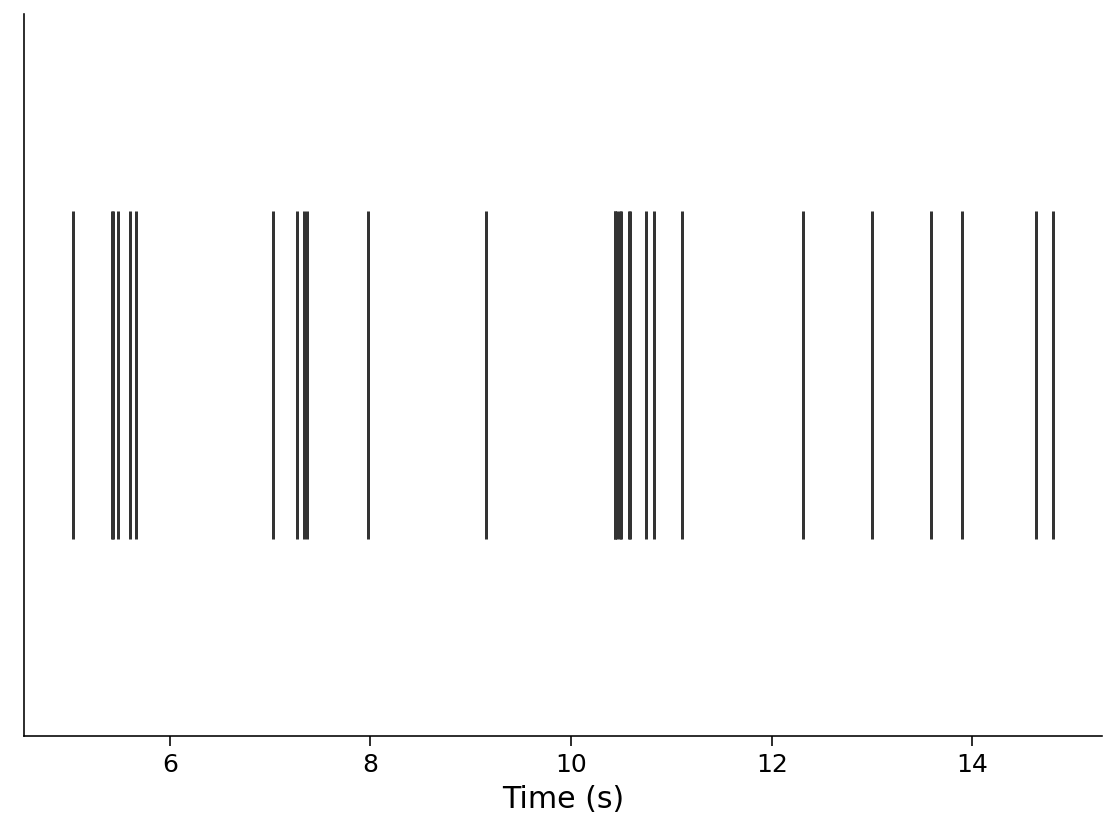

In [83]:
idx = 1

plt.eventplot(interval_spike_times[idx],color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

In [85]:
spike_times_flat = np.concatenate(spike_times)
experiment_duration = np.ptp(spike_times_flat)
interval_duration = t_interval[1] - t_interval[0]

frac_interval_time = interval_duration / experiment_duration
print(f"{frac_interval_time:.2%} of the total time is in the interval")
print(experiment_duration)

0.37% of the total time is in the interval
2702.6396


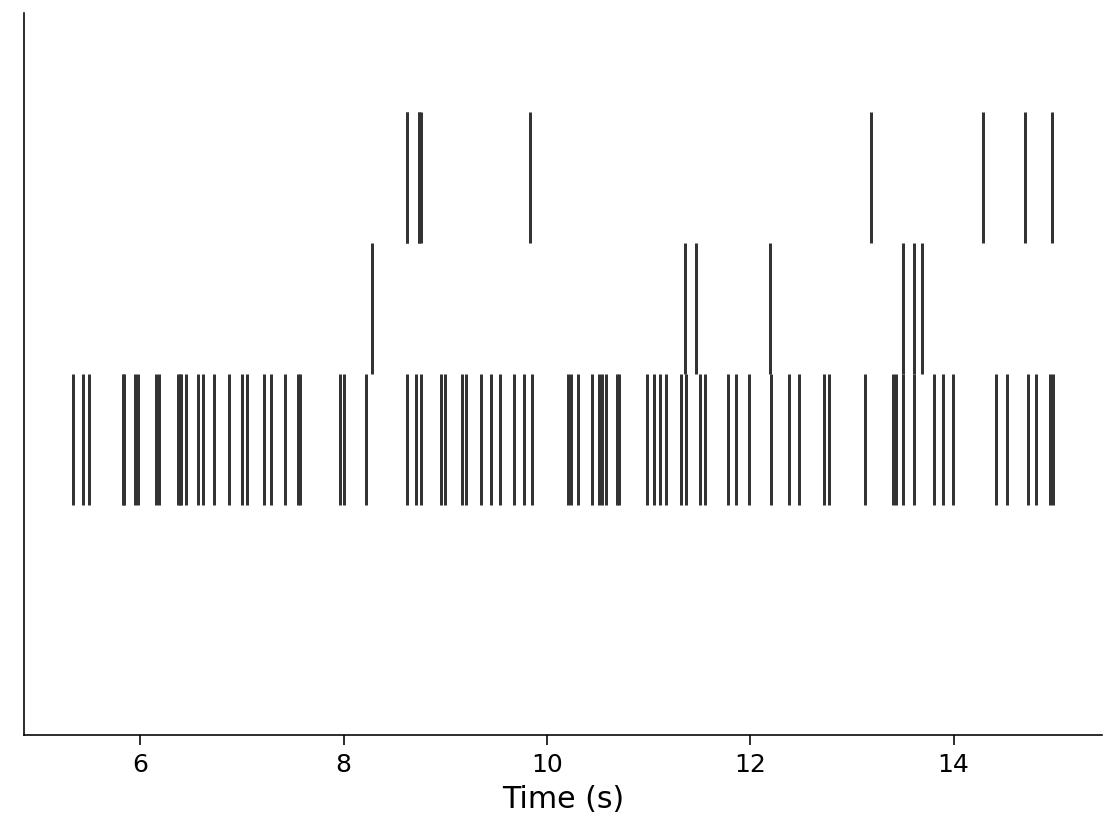

In [88]:
neuron_idx = [20,312,47,700]
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

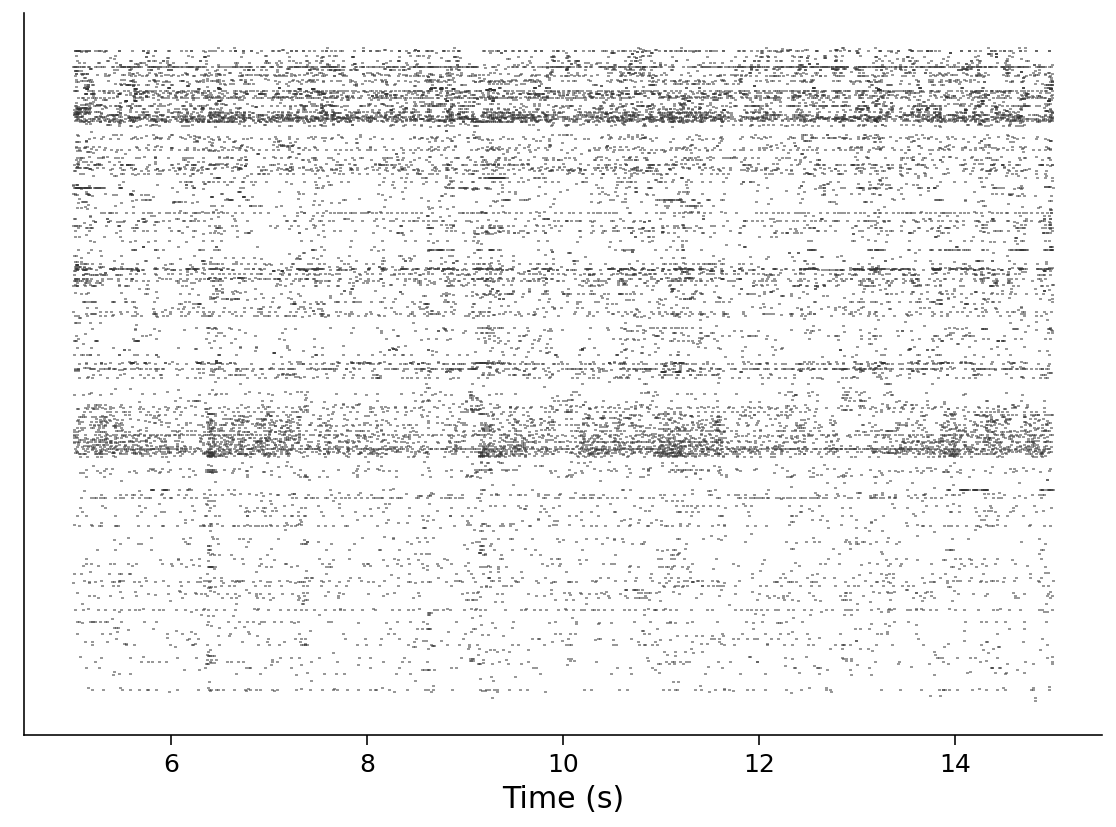

In [91]:
neuron_idx = np.arange(0, len(spike_times), 1)
plt.eventplot(interval_spike_times[neuron_idx], color=".2")
plt.xlabel("Time (s)")
plt.yticks([]);

In [102]:
def compute_neurons_isis(spike_times):
    isi = []
    for n in spike_times:
        isi.append(np.diff(n))
        
    isi = np.array(isi,object)
    return isi

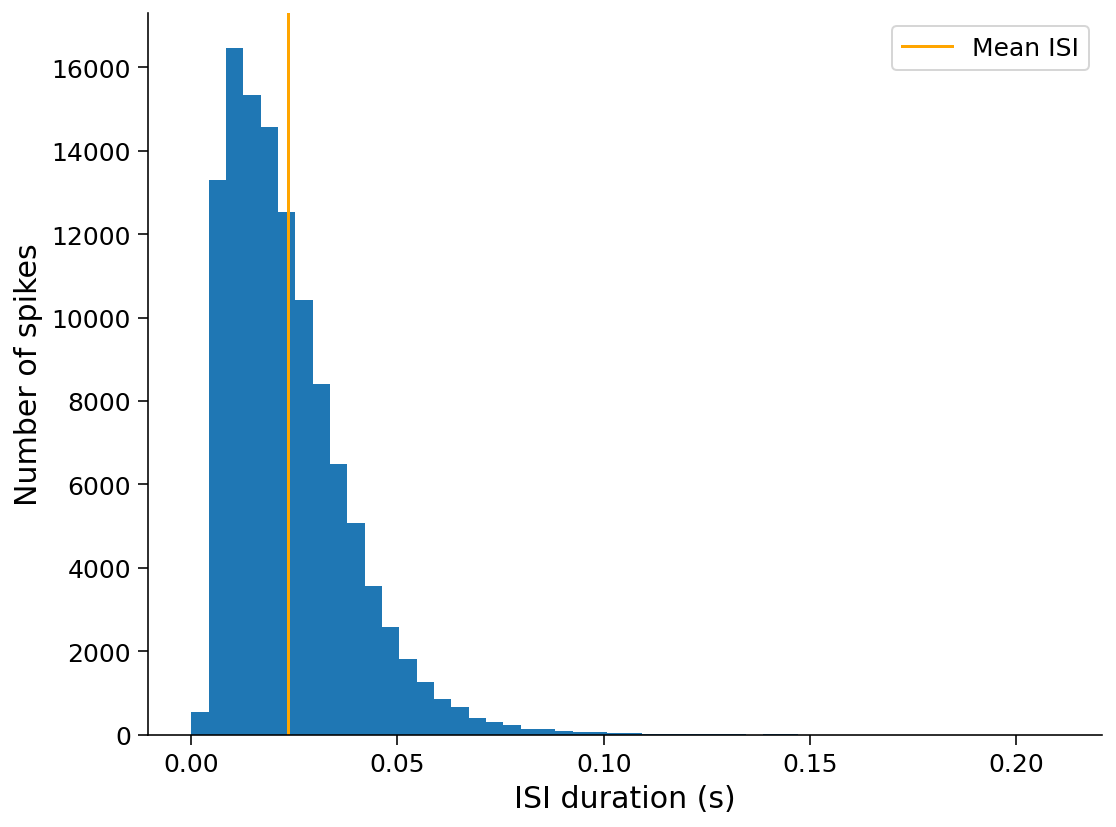

In [111]:
id = 283
isi = compute_neurons_isis(spike_times)
plot_isis(isi[id])